In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape to add channel dimension (28x28 -> 28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Pad images to 32x32
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

In [4]:
x_train = tf.image.resize(x_train, [48, 48])
x_test = tf.image.resize(x_test, [48, 48])

# Convert to 3 channels by repeating the grayscale channel
x_train = tf.repeat(x_train, 3, -1)
x_test = tf.repeat(x_test, 3, -1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(48, 48, 3)))
x = Flatten()(vgg16.output)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=predictions)

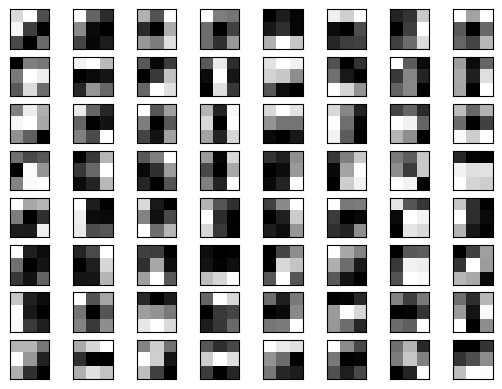

In [10]:
import matplotlib.pyplot as plt

def plot_filters(layer, x, y):
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    fig, axes = plt.subplots(x, y)

    idx = 0
    for i in range(x):
        for j in range(y):
            if idx < filters.shape[3]:
                ax = axes[i, j]
                ax.set_xticks([])
                ax.set_yticks([])
                ax.imshow(filters[:, :, 0, idx], cmap='gray')
                idx += 1
            else:
                axes[i, j].axis('off')

    plt.show()

# Choose a convolutional layer and its dimensions (x, y) for visualization
conv_layer = model.layers[2]  # Replace with the layer of your choice
x, y = 8, 8  # Grid size for visualization, adjust based on the number of filters

plot_filters(conv_layer, x, y)

1/1 [==============================] - 0s 67ms/step


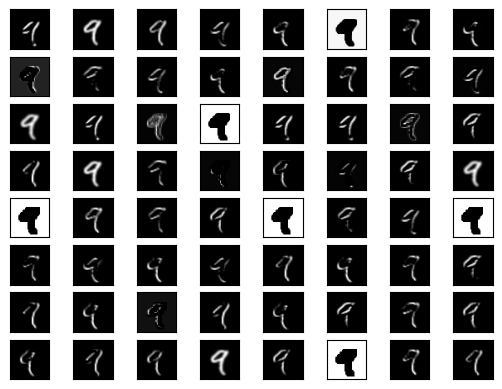

In [15]:
def plot_feature_maps(model, layer_name, image, n_features):
    feature_map_model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)
    feature_maps = feature_map_model.predict(image)

    square = int(np.sqrt(n_features))
    ix = 1
    fig, axes = plt.subplots(square, square)

    for _ in range(square):
        for _ in range(square):
            ax = axes[int((ix-1)/square), (ix-1)%square]
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1

    plt.show()

# Choose a layer, an image, and the number of features to visualize
layer_name = 'block1_conv1'  # Replace with the layer of your choice
image = x_train[4:5]  # Select an image from the dataset
n_features = 64  # Adjust based on the layer

plot_feature_maps(model, layer_name, image, n_features)
